In [1]:
# import libraries & packages

%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from matplotlib.offsetbox import AnchoredText
import matplotlib.cm as cm
import pandas as pd
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import FormatStrFormatter
import matplotlib
from glob import glob


import assaytools


from assaytools import platereader

In [2]:
# define ligand concentration array

concentrations_96_single = np.array([  0.00000000e+00,   8.00000000e-09,   1.34778097e-08,
         2.27064194e-08,   3.82541000e-08,   6.44476851e-08,
         1.08576705e-07,   1.82922021e-07,   3.08173524e-07,
         5.19188015e-07,   8.74689659e-07,   1.47361260e-06, 2.48263378e-06,
         4.18255821e-06, 7.04646547e-06, 1.118713651e-05, 2.0e-05])

In [3]:
# load data files

# single_WV

filenames_single_wv = sorted(glob('infinite_results/single_wv/*.xml'))
filenames_single_wv.sort(key=os.path.getctime)

# spectra

In [4]:
# read data files

# single_WV

reads_single_wv = list()
nreads_single_wv = len(filenames_single_wv)
for read in range(nreads_single_wv):
    read = platereader.read_icontrol_xml(filenames_single_wv[read])
    reads_single_wv.append(read)

In [5]:
# create function to extract data

def extract_data_96_single(well):
    measurements_list = list()
    measurements = [reads_single_wv[i]['ex280_em480_top_gain100'][well] for i in range(17)]
    for i in range(len(measurements)):
        measurements = [x if x != 'OVER' else 0 for x in measurements]
        measurements = [float(i) for i in measurements]
    measurements_list.append(measurements)
    # unpack nested list
    measurements_unpack= [x for sub_list in measurements_list for x in sub_list]
    
    return(measurements_unpack)

In [6]:
# extract and organize data across ligand concentration

# p38

p38_Bos_single_wv = extract_data_96_single('A11')
p38_Bos_Iso_single_wv = extract_data_96_single('C11')
p38_Erl_single_wv = extract_data_96_single('E11')
p38_Gef_single_wv = extract_data_96_single('G11')


# Abl
Abl_Bos_single_wv = extract_data_96_single('B1')
Abl_Bos_Iso_single_wv = extract_data_96_single('D1')
Abl_Erl_single_wv = extract_data_96_single('F1')
Abl_Gef_single_wv = extract_data_96_single('H1')

# Src
Src_Bos_single_wv = extract_data_96_single('B7')
Src_Bos_Iso_single_wv = extract_data_96_single('D7')
Src_Erl_single_wv = extract_data_96_single('F7')
Src_Gef_single_wv = extract_data_96_single('H7')

# buffer
buff_Bos_single_wv = extract_data_96_single('A2')
buff_Bos_Iso_single_wv = extract_data_96_single('C2')
buff_Erl_single_wv = extract_data_96_single('E2')
buff_Gef_single_wv = extract_data_96_single('G2')

In [7]:
# create plotting function

def plot(prot, buff, i, lig):
    current_palette = sns.color_palette('YlGnBu_d', 8)
    
    plt.semilogx(concentrations_96_single, prot, c=current_palette[i], marker='.', linewidth=2, markersize=6)
    plt.semilogx(concentrations_96_single, buff, c=current_palette[i], linestyle='--', linewidth=2, markersize=6)
    
    ax1.yaxis.set_tick_params(labelsize=8)
    ax1.xaxis.set_tick_params(labelsize=8)
    plt.minorticks_off()
    ax1.set_ylim(10**2, 50000)
    
    plt.legend(['protein + ligand', 'ligand'], loc=2, prop={'size': 8})
    plt.title('%s' %(lig), fontsize=10)
    
    sns.set_style(style='white')
    sns.despine()

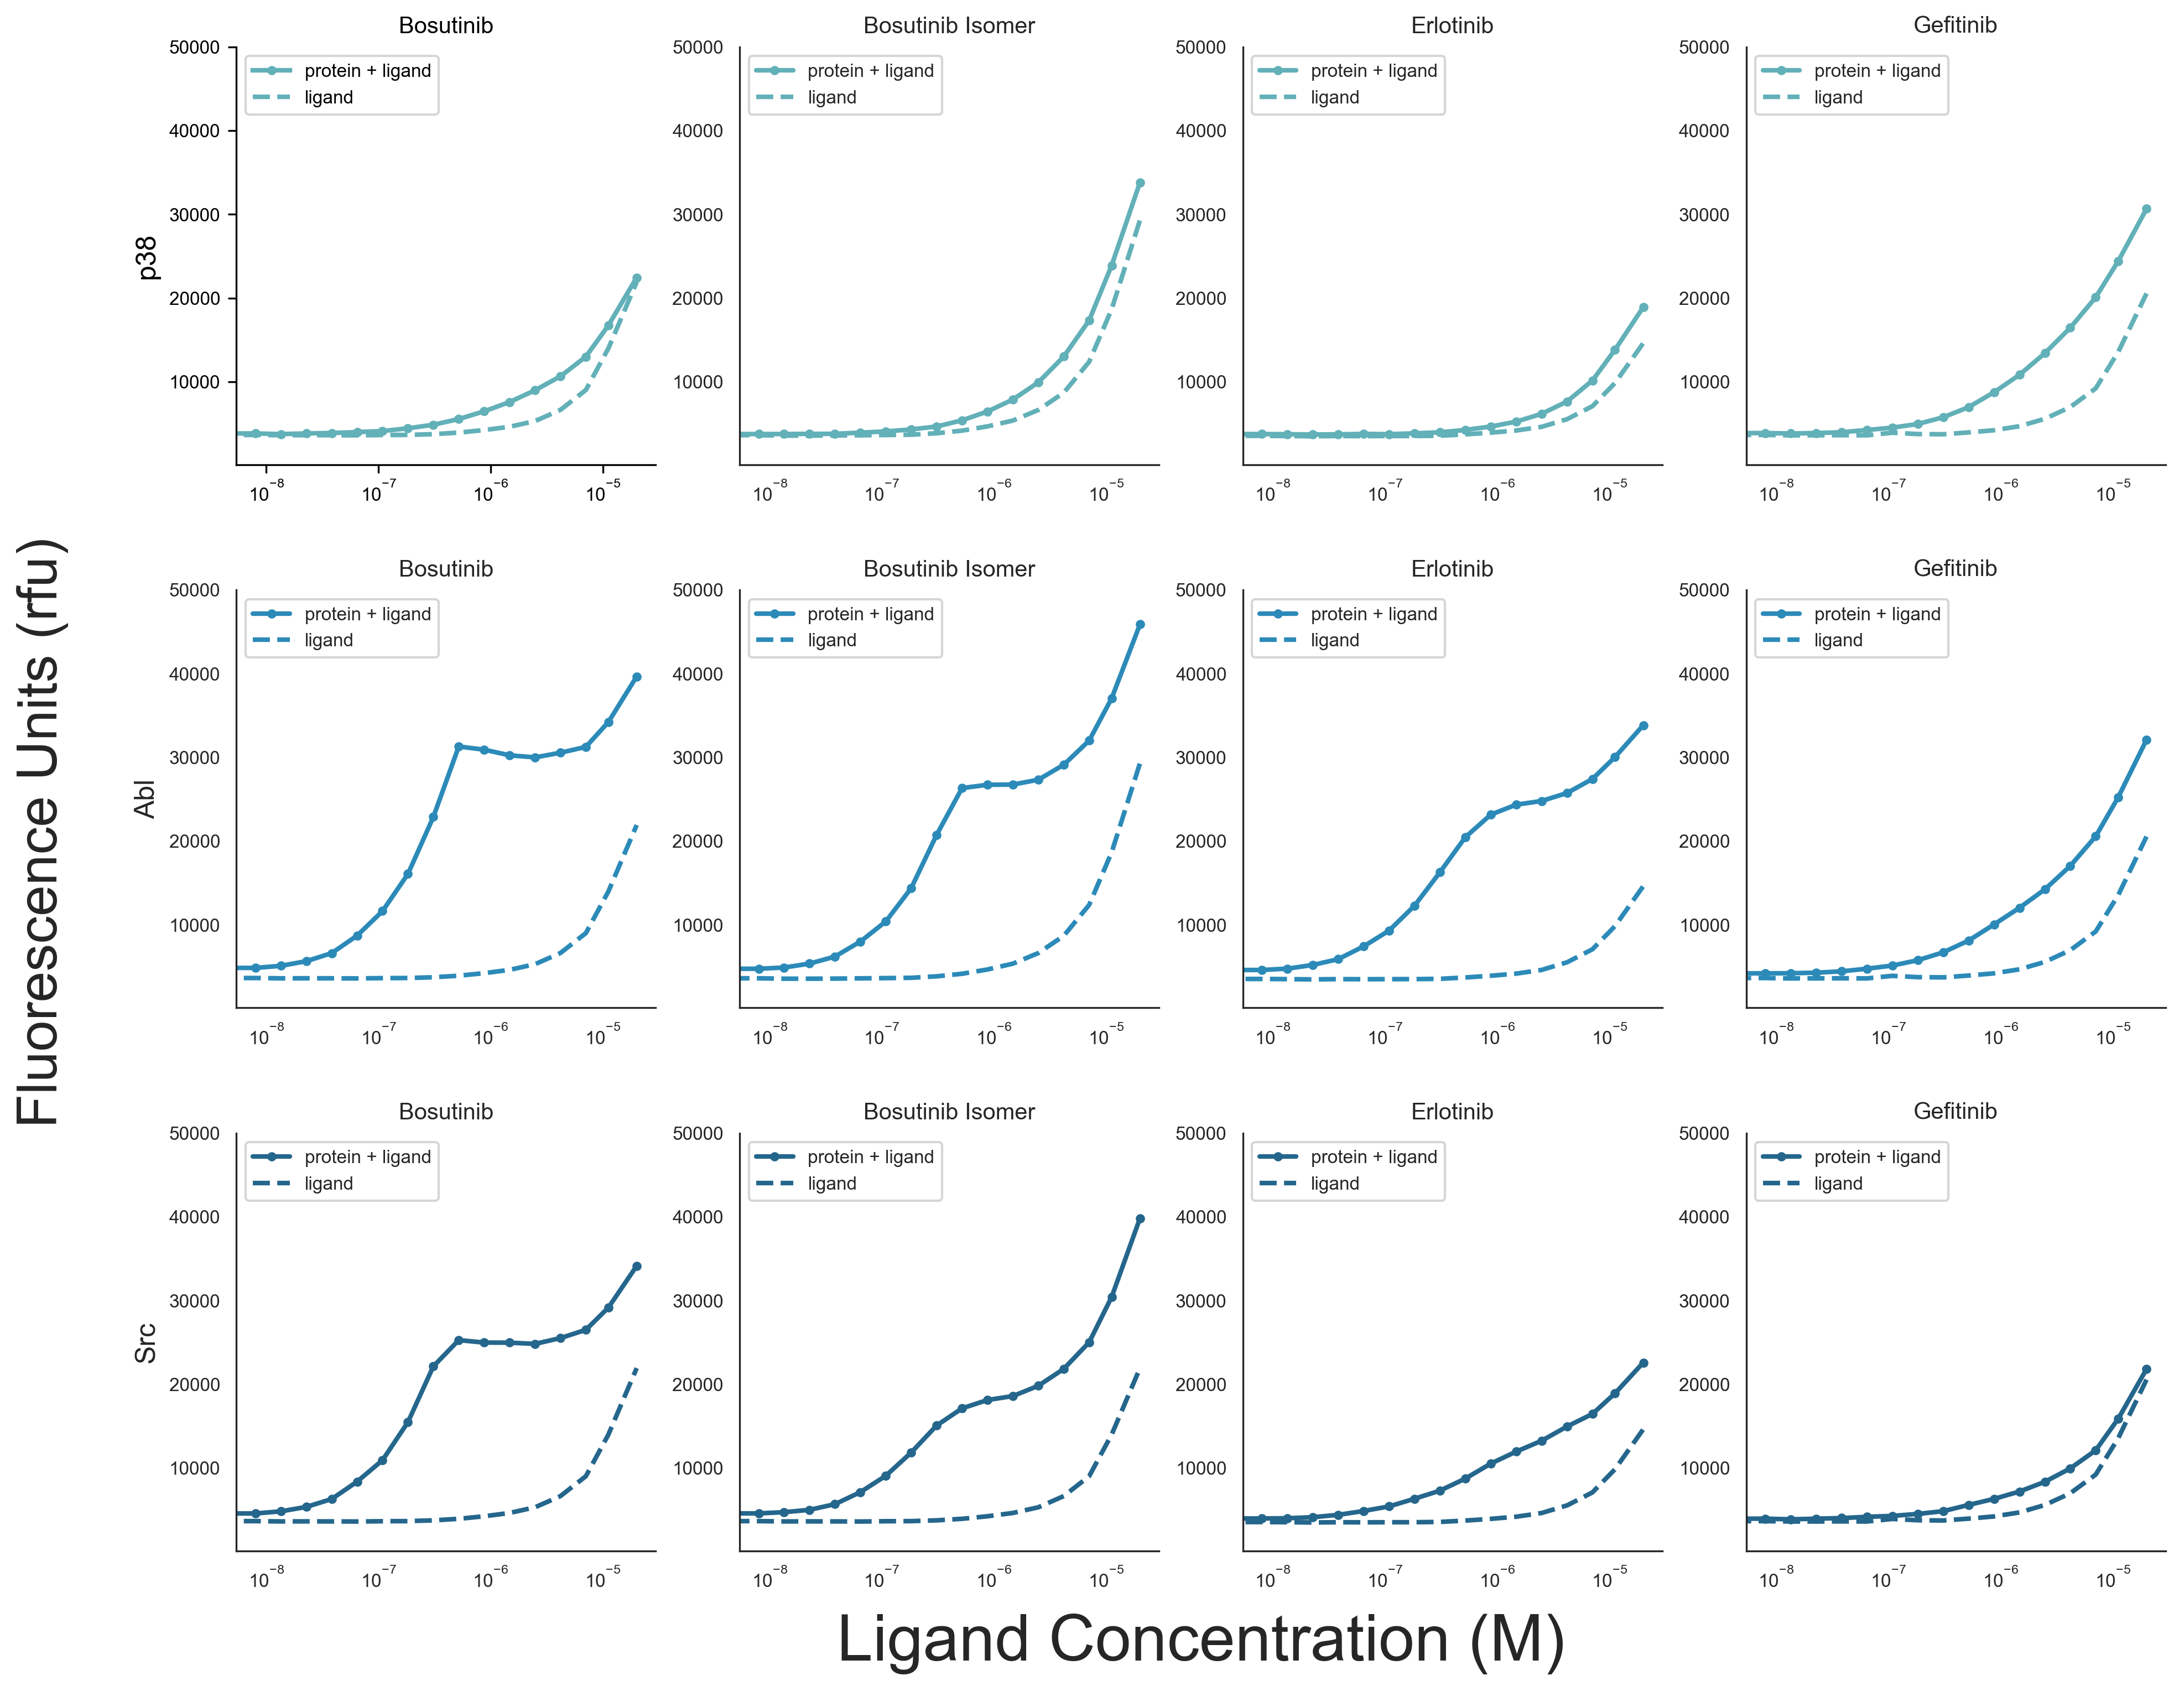

In [8]:
# plot data

fig = plt.figure(figsize=(15,12), dpi=300)
fig.subplots_adjust(hspace=0.3)

# p38

ax1 = fig.add_subplot(3,4,1)
p38_Bos = plot(prot=p38_Bos_single_wv, buff=buff_Bos_single_wv, lig='Bosutinib', i=6)
axis = plt.gca()
plt.ylabel('p38', fontsize=12)

ax1 = fig.add_subplot(3,4,2)
p38_Bos_Iso = plot(prot=p38_Bos_Iso_single_wv, buff=buff_Bos_Iso_single_wv, lig='Bosutinib Isomer', i=6)

ax1 = fig.add_subplot(3,4,3)
p38_Erl = plot(prot=p38_Erl_single_wv, buff=buff_Erl_single_wv, lig='Erlotinib', i=6)

ax1 = fig.add_subplot(3,4,4)
p38_Gef = plot(prot=p38_Gef_single_wv, buff=buff_Gef_single_wv, lig='Gefitinib', i=6)

# Abl

ax1 = fig.add_subplot(3,4,5)
Abl_Bos = plot(prot=Abl_Bos_single_wv, buff=buff_Bos_single_wv, lig='Bosutinib', i=4)
axis = plt.gca()
plt.ylabel('Abl', fontsize=12)

ax1 = fig.add_subplot(3,4,6)
Abl_Bos_Iso = plot(prot=Abl_Bos_Iso_single_wv, buff=buff_Bos_Iso_single_wv, lig='Bosutinib Isomer', i=4)

ax1 = fig.add_subplot(3,4,7)
Abl_Erl = plot(prot=Abl_Erl_single_wv, buff=buff_Erl_single_wv, lig='Erlotinib', i=4)

ax1 = fig.add_subplot(3,4,8)
Abl_Gef = plot(prot=Abl_Gef_single_wv, buff=buff_Gef_single_wv, lig='Gefitinib', i=4)

# Src

ax1 = fig.add_subplot(3,4,9)
Src_Bos = plot(prot=Src_Bos_single_wv, buff=buff_Bos_single_wv, lig='Bosutinib', i=2)
axis = plt.gca()
plt.ylabel('Src', fontsize=12)

ax1 = fig.add_subplot(3,4,10)
Src_Bos_Iso = plot(prot=Src_Bos_Iso_single_wv, buff=buff_Bos_single_wv, lig='Bosutinib Isomer', i=2)

ax1 = fig.add_subplot(3,4,11)
Src_Erl = plot(prot=Src_Erl_single_wv, buff=buff_Erl_single_wv, lig='Erlotinib', i=2)

ax1 = fig.add_subplot(3,4,12)
Src_Gef = plot(prot=Src_Gef_single_wv, buff=buff_Gef_single_wv, lig='Gefitinib', i=2)

axis = plt.gca()
plt.ylabel('Fluorescence Units (rfu)', fontsize=24)
axis.yaxis.set_label_coords(-4,1.72)
plt.xlabel('Ligand Concentration (M)', fontsize=28)
axis.xaxis.set_label_coords(-1.3,-0.15)

fig.savefig('20190612_single_well_NB_timing.pdf', dpi=300, bbox='tight')